<a href="https://colab.research.google.com/github/harman-ransi-1016/AI_News_Detection/blob/main/SVM_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports / Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/drive/MyDrive/CS Foundation Courses/Text Mining/Code/FinalDataSet.csv'
df = pd.read_csv(file_path)
df.head()

,Class,Section,Article text,Average Word Length,Flesch Reading Ease,Flesch-Kincaid Grade Level,Coleman-Liau Index,Gunning Fog Index
0,Real,sport,Nike is to shut down its elite Oregon Project...,5.059406,54.26,12.0,11.44,13.95
1,AI,sport,Nike has announced that it will be closing dow...,5.212025,58.52,10.3,12.24,13.00
2,AI,us,Country singer Kenny Chesney expressed his dee...,5.070588,64.51,8.0,10.61,10.60
3,Real,us,Country singer Kenny Chesney said Tuesday tha...,4.504608,68.81,8.5,8.18,10.07
4,Real,uk,A farmer was crushed to death last year when ...,4.714286,62.51,10.9,9.46,12.97


# Grid Search for Most Optimal Model

## First Iteration

Best Model: C = 5.0, gamma = auto, kernel = rbf
* best cv: 82.4%

In [ ]:
# Assuming df is your DataFrame and it's already loaded
df_numeric = df[['Average Word Length', 'Flesch Reading Ease', 'Flesch-Kincaid Grade Level', 'Coleman-Liau Index', 'Gunning Fog Index']]
X = df_numeric  # Features


# Map 'Real' to 0 and 'AI' to 1
df['Class'] = df['Class'].map({'Real': 0, 'AI': 1})
y = df['Class']  # Target

# It's a good practice to scale our data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
param_grid = {
    'C': [0.1, 0.5, 1.0, 5.0, 7.0],
    'gamma': ['auto', 0.1, 1, 10],
    'kernel': ['rbf']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)

grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the results
print("Grid Search Results:")
print("Best Parameters: ", best_params)
print("\nBest Estimator: ", best_model)

# Access the CV results
cv_results = grid_search.cv_results_

# Print mean test scores for each combination of parameters
print("\nMean Test Scores for each parameter combination:")
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Mean Test Score: {mean_score:.3f}, Parameters: {params}")

Grid Search Results:
Best Parameters:  {'C': 5.0, 'gamma': 'auto', 'kernel': 'rbf'}

Best Estimator:  SVC(C=5.0, gamma='auto', random_state=42)

Mean Test Scores for each parameter combination:
Mean Test Score: 0.756, Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Test Score: 0.747, Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Score: 0.762, Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mean Test Score: 0.699, Parameters: {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
Mean Test Score: 0.788, Parameters: {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Test Score: 0.782, Parameters: {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Score: 0.791, Parameters: {'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}
Mean Test Score: 0.770, Parameters: {'C': 0.5, 'gamma': 10, 'kernel': 'rbf'}
Mean Test Score: 0.800, Parameters: {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Test Score: 0.800, Parameters: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Score: 0.806,

In [ ]:
# Best parameters for the first set
best_params_1 = {'C': 5.0, 'gamma': 'auto', 'kernel': 'rbf'}

# Best parameters for the second set
best_params_2 = {'C': 7.0, 'gamma': 0.1, 'kernel': 'rbf'}

# Create SVM models with the best parameters
svm_model_1 = SVC(**best_params_1, random_state=42)
svm_model_2 = SVC(**best_params_2, random_state=42)

# Perform cross-validation for each model
cv_scores_1 = cross_val_score(svm_model_1, X_train, y_train, cv=5)
cv_scores_2 = cross_val_score(svm_model_2, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores for Model 1:", cv_scores_1)
print("Average Cross-Validation Score for Model 1:", pd.Series(cv_scores_1).mean())

print("\nCross-Validation Scores for Model 2:", cv_scores_2)
print("Average Cross-Validation Score for Model 2:", pd.Series(cv_scores_2).mean())

Cross-Validation Scores for Model 1: [0.82947368 0.81052632 0.82489451 0.8185654  0.83755274]
Average Cross-Validation Score for Model 1: 0.8242025316455697

Cross-Validation Scores for Model 2: [0.82105263 0.81263158 0.82700422 0.82278481 0.83333333]
Average Cross-Validation Score for Model 2: 0.8233613146791028


## Second Iteration

Best Model: C = 7.0, gamma = .3, kernel = rbf
* Mean_CV = 82.6%

In [ ]:
# Define the refined parameter grid
refined_param_grid = {
    'C': [4, 5, 6, 7, 8],
    'gamma': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'kernel': ['rbf']
}

# Create the GridSearchCV object
refined_grid_search = GridSearchCV(SVC(random_state=42), refined_param_grid, cv=5)

# Fit the grid search to the data
refined_grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_refined_params = refined_grid_search.best_params_
best_refined_model = refined_grid_search.best_estimator_

# Print the results
print("Refined Grid Search Results:")
print("Best Parameters: ", best_refined_params)
print("\nBest Estimator: ", best_refined_model)

# Access the CV results
refined_cv_results = refined_grid_search.cv_results_

# Print mean test scores for each combination of parameters
print("\nMean Test Scores for each parameter combination:")
for mean_score, params in zip(refined_cv_results['mean_test_score'], refined_cv_results['params']):
    print(f"Mean Test Score: {mean_score:.3f}, Parameters: {params}")


Refined Grid Search Results:
Best Parameters:  {'C': 7, 'gamma': 0.3, 'kernel': 'rbf'}

Best Estimator:  SVC(C=7, gamma=0.3, random_state=42)

Mean Test Scores for each parameter combination:
Mean Test Score: 0.815, Parameters: {'C': 4, 'gamma': 0.05, 'kernel': 'rbf'}
Mean Test Score: 0.817, Parameters: {'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Score: 0.823, Parameters: {'C': 4, 'gamma': 0.15, 'kernel': 'rbf'}
Mean Test Score: 0.824, Parameters: {'C': 4, 'gamma': 0.2, 'kernel': 'rbf'}
Mean Test Score: 0.823, Parameters: {'C': 4, 'gamma': 0.25, 'kernel': 'rbf'}
Mean Test Score: 0.822, Parameters: {'C': 4, 'gamma': 0.3, 'kernel': 'rbf'}
Mean Test Score: 0.817, Parameters: {'C': 5, 'gamma': 0.05, 'kernel': 'rbf'}
Mean Test Score: 0.822, Parameters: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Score: 0.823, Parameters: {'C': 5, 'gamma': 0.15, 'kernel': 'rbf'}
Mean Test Score: 0.824, Parameters: {'C': 5, 'gamma': 0.2, 'kernel': 'rbf'}
Mean Test Score: 0.822, Parameters: {'C': 5

In [ ]:
# Best parameters for the first set
best_params_1 = {'C': 7.0, 'gamma': .3, 'kernel': 'rbf'}

# Best parameters for the second set
best_params_2 = {'C': 8.0, 'gamma': 0.3, 'kernel': 'rbf'}

# SVMs
svm_model_1 = SVC(**best_params_1, random_state=42)
svm_model_2 = SVC(**best_params_2, random_state=42)

# Cross Val
cv_scores_1 = cross_val_score(svm_model_1, X_train, y_train, cv=5)
cv_scores_2 = cross_val_score(svm_model_2, X_train, y_train, cv=5)

# Print Scores
print("Cross-Validation Scores for Model 1:", cv_scores_1)
print("Average Cross-Validation Score for Model 1:", pd.Series(cv_scores_1).mean())

print("\nCross-Validation Scores for Model 2:", cv_scores_2)
print("Average Cross-Validation Score for Model 2:", pd.Series(cv_scores_2).mean())

Cross-Validation Scores for Model 1: [0.83789474 0.81263158 0.82700422 0.81434599 0.83755274]
Average Cross-Validation Score for Model 1: 0.8258858538751943

Cross-Validation Scores for Model 2: [0.83578947 0.81684211 0.82700422 0.81434599 0.83544304]
Average Cross-Validation Score for Model 2: 0.8258849655785031


## Third Iteration

No improvements at all, stopping model search

In [ ]:
# Define the refined parameter grid
refined_param_grid = {
    'C': [7, 7.5, 8, 8.5],
    'gamma': [0.25, .275, 0.3, .325, 0.35],
    'kernel': ['rbf']
}

# Create the GridSearchCV object
refined_grid_search = GridSearchCV(SVC(random_state=42), refined_param_grid, cv=5)

# Fit the grid search to the data
refined_grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_refined_params = refined_grid_search.best_params_
best_refined_model = refined_grid_search.best_estimator_

# Print the results
print("Refined Grid Search Results:")
print("Best Parameters: ", best_refined_params)
print("\nBest Estimator: ", best_refined_model)

# Access the CV results
refined_cv_results = refined_grid_search.cv_results_

# Print mean test scores for each combination of parameters
print("\nMean Test Scores for each parameter combination:")
for mean_score, params in zip(refined_cv_results['mean_test_score'], refined_cv_results['params']):
    print(f"Mean Test Score: {mean_score:.3f}, Parameters: {params}")


Refined Grid Search Results:
Best Parameters:  {'C': 7.5, 'gamma': 0.25, 'kernel': 'rbf'}

Best Estimator:  SVC(C=7.5, gamma=0.25, random_state=42)

Mean Test Scores for each parameter combination:
Mean Test Score: 0.824, Parameters: {'C': 7, 'gamma': 0.25, 'kernel': 'rbf'}
Mean Test Score: 0.824, Parameters: {'C': 7, 'gamma': 0.275, 'kernel': 'rbf'}
Mean Test Score: 0.826, Parameters: {'C': 7, 'gamma': 0.3, 'kernel': 'rbf'}
Mean Test Score: 0.822, Parameters: {'C': 7, 'gamma': 0.325, 'kernel': 'rbf'}
Mean Test Score: 0.822, Parameters: {'C': 7, 'gamma': 0.35, 'kernel': 'rbf'}
Mean Test Score: 0.826, Parameters: {'C': 7.5, 'gamma': 0.25, 'kernel': 'rbf'}
Mean Test Score: 0.825, Parameters: {'C': 7.5, 'gamma': 0.275, 'kernel': 'rbf'}
Mean Test Score: 0.824, Parameters: {'C': 7.5, 'gamma': 0.3, 'kernel': 'rbf'}
Mean Test Score: 0.823, Parameters: {'C': 7.5, 'gamma': 0.325, 'kernel': 'rbf'}
Mean Test Score: 0.822, Parameters: {'C': 7.5, 'gamma': 0.35, 'kernel': 'rbf'}
Mean Test Score: 0.8

## Data Visuals

Confusion Matrix

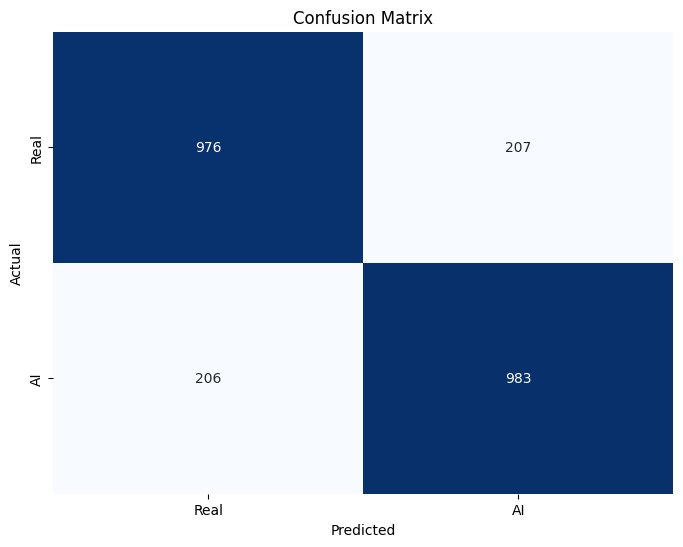

In [ ]:
# Cross-validation predictions
cv_predictions_1 = cross_val_predict(svm_model_1, X_train, y_train, cv=5)

# Confusion matrix
conf_matrix_1 = confusion_matrix(y_train, cv_predictions_1)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Real', 'AI'], yticklabels=['Real', 'AI'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#

General Data Statistics and Visuals

Average Word Length for Real Articles: 5.043610276832809
Average Word Length for AI Articles: 5.309632103654479
--


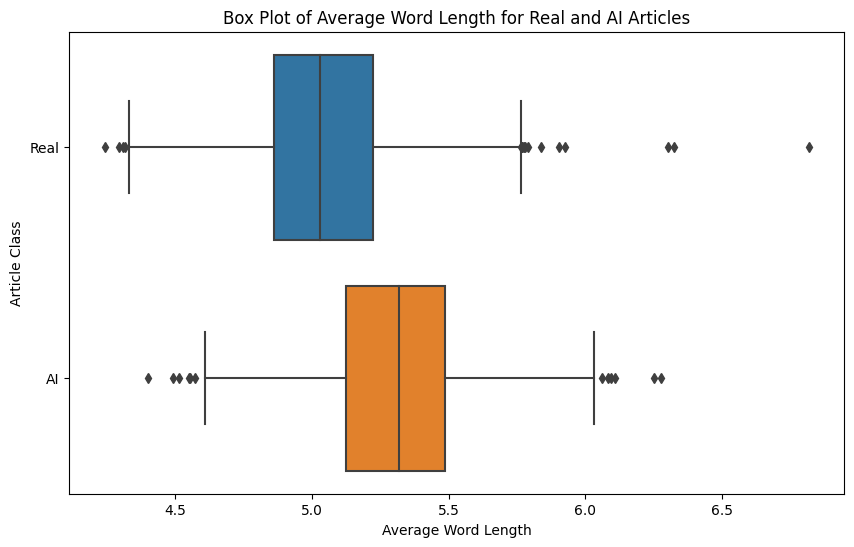

In [ ]:
real_articles = df[df['Class'] == 'Real']
ai_articles = df[df['Class'] == 'AI']

# Calculate average word length for each group
average_word_length_real = real_articles['Average Word Length'].mean()
average_word_length_ai = ai_articles['Average Word Length'].mean()

# Print the results
print("Average Word Length for Real Articles:", average_word_length_real)
print("Average Word Length for AI Articles:", average_word_length_ai)
print("--")

# Create a horizontal box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y='Class', x='Average Word Length', data=df, orient='h')
plt.title('Box Plot of Average Word Length for Real and AI Articles')
plt.xlabel('Average Word Length')
plt.ylabel('Article Class')
plt.show()

In [ ]:
real_articles = df[df['Class'] == 'Real'].copy()
ai_articles = df[df['Class'] == 'AI'].copy()


# Function to calculate average sentence length
def average_sentence_length(text):
    sentences = text.split('.')  # Split text into sentences
    sentence_lengths = [len(sentence.split()) for sentence in sentences]  # Calculate the length of each sentence
    return np.mean(sentence_lengths)  # Return the average sentence length

# Calculate the average sentence length for each record (article) in Real articles
real_articles.loc[:, 'Average Sentence Length'] = real_articles['Article text'].apply(average_sentence_length)

# Calculate the average sentence length for each record (article) in AI articles
ai_articles.loc[:, 'Average Sentence Length'] = ai_articles['Article text'].apply(average_sentence_length)

# Calculate the overall average sentence length for Real and AI articles
overall_average_sentence_length_real = real_articles['Average Sentence Length'].mean()
overall_average_sentence_length_ai = ai_articles['Average Sentence Length'].mean()

# Display the overall average sentence length for Real and AI articles
print("Overall Average Sentence Length for Real Articles:", overall_average_sentence_length_real)
print("Overall Average Sentence Length for AI Articles:", overall_average_sentence_length_ai)


Overall Average Sentence Length for Real Articles: 19.751003956542267
Overall Average Sentence Length for AI Articles: 19.111042229690362


In [ ]:
# Function to calculate the number of sentences in an article
def number_of_sentences(text):
    sentences = text.split('.')  # Split text into sentences
    return len(sentences)  # Return the number of sentences

# Calculate the number of sentences for each record (article) in Real articles
real_articles['Number of Sentences'] = real_articles['Article text'].apply(number_of_sentences)

# Calculate the number of sentences for each record (article) in AI articles
ai_articles['Number of Sentences'] = ai_articles['Article text'].apply(number_of_sentences)

# Calculate the overall average number of sentences for Real and AI articles
overall_average_sentences_real = real_articles['Number of Sentences'].mean()
overall_average_sentences_ai = ai_articles['Number of Sentences'].mean()

# Display the overall average number of sentences for Real and AI articles
print("Overall Average Number of Sentences for Real Articles:", overall_average_sentences_real)
print("Overall Average Number of Sentences for AI Articles:", overall_average_sentences_ai)



Overall Average Number of Sentences for Real Articles: 17.546190155091033
Overall Average Number of Sentences for AI Articles: 18.759271746459877


In [ ]:
# Function to calculate average sentence length
def average_sentence_length(text):
    sentences = text.split('.')  # Split text into sentences
    sentence_lengths = [len(sentence.split()) for sentence in sentences]  # Calculate the length of each sentence
    return np.mean(sentence_lengths)  # Return the average sentence length

# Calculate average word length for each group
average_word_length_real = real_articles['Average Word Length'].mean()
average_word_length_ai = ai_articles['Average Word Length'].mean()

# Calculate the overall average sentence length for Real and AI articles
overall_average_sentence_length_real = real_articles['Article text'].apply(average_sentence_length).mean()
overall_average_sentence_length_ai = ai_articles['Article text'].apply(average_sentence_length).mean()

# Function to calculate the number of sentences in an article
def number_of_sentences(text):
    sentences = text.split('.')  # Split text into sentences
    return len(sentences)  # Return the number of sentences

# Calculate the overall average number of sentences for Real and AI articles
overall_average_sentences_real = real_articles['Article text'].apply(number_of_sentences).mean()
overall_average_sentences_ai = ai_articles['Article text'].apply(number_of_sentences).mean()

# Create a transposed DataFrame to display the differences
data = {
    'Avg Word Len': [round(average_word_length_real, 2), round(average_word_length_ai, 2)],
    'Avg Sentence Len': [round(overall_average_sentence_length_real, 2), round(overall_average_sentence_length_ai, 2)],
    'Avg # of Sentences': [round(overall_average_sentences_real, 2), round(overall_average_sentences_ai, 2)]
}

results_df = pd.DataFrame(data, index=['Real', 'AI']).T

# Display the DataFrame
print(results_df)

                     Real     AI
Avg Word Len         5.04   5.31
Avg Sentence Len    19.75  19.11
Avg # of Sentences  17.55  18.76
